In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Random Seed:

In [25]:
seed_value= 0

import os
os.environ['PYTHONHASHSEED']=str(seed_value)

import random
random.seed(seed_value)

import numpy as np
np.random.seed(seed_value)

import tensorflow as tf
tf.random.set_seed(seed_value)

from tensorflow.python.keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
#sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
sess = tf.compat.v1.Session()
K.set_session(sess)

In [26]:
'''df = pd.read_csv("Data/ML_GRF_stance_N.csv", header=None)
df'''

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,3.591,2.30980,1.30420,1.544600,0.99642,-0.86461,-1.8383,-3.34520,-5.4749,-8.6983,...,2.4066,2.31010,2.44570,2.7795,2.54120,2.6060,2.2587,2.8207,3.6663,2.977
1,2.199,0.30152,-0.49052,-0.002909,0.89121,0.30170,-2.7868,-6.95390,-9.0650,-8.6581,...,-2.6806,-1.52520,-0.81006,-1.4067,-0.30921,1.4658,1.6661,2.5326,2.9095,3.889
2,4.317,1.07650,-0.75328,0.764090,-0.55040,-3.91910,-7.3576,-10.71500,-12.6630,-11.4040,...,19.6700,17.28500,13.19600,10.5000,8.78740,7.5012,7.3930,6.2177,5.0284,4.098
3,3.310,0.52531,1.30960,0.409730,-2.29800,-5.33850,-9.7976,-12.07200,-12.3320,-10.2080,...,7.8613,7.05710,6.05990,4.8255,4.89040,5.4780,5.8122,6.0775,3.7969,4.605
4,1.821,-1.24800,-5.39700,-6.074400,-5.49380,-8.26350,-9.4401,-9.57430,-9.1991,-5.4045,...,17.5130,16.00400,13.37500,12.1960,9.85130,10.2140,8.3698,7.0593,6.6789,5.439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15691,-0.434,4.50740,5.93060,-2.600900,-14.79000,-21.28800,-24.8200,-21.49100,-24.4130,-20.9730,...,1.5590,-0.46055,0.12782,3.0011,5.22610,6.6191,7.3697,6.1280,4.3417,2.069
15692,1.164,4.43190,6.86710,-1.672000,-13.79200,-16.55900,-19.6420,-15.64400,-15.9730,-11.9680,...,16.6990,15.46100,14.13000,12.3930,9.90540,11.1470,10.2610,9.6713,7.0213,4.497
15693,4.382,6.59760,10.75200,9.721600,8.98050,1.87340,-6.8512,-11.07200,-13.6950,-13.3810,...,7.4279,4.48850,4.43140,6.7222,9.92060,8.3431,9.4538,8.9652,8.4592,4.879
15694,2.034,4.12090,9.56290,10.201000,4.41000,0.35724,-2.6013,-0.57981,-2.3533,-2.0854,...,12.7620,11.09300,9.80270,10.3710,11.67700,10.8000,10.5260,10.5630,8.7945,5.286


In [27]:
df1 = pd.read_csv("Data/ML_GRF_stance_N_subset.csv", header=0)
df1 = df1.drop("ID2", axis=1)
df1

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
0,3.591,2.30980,1.30420,1.544600,0.99642,-0.86461,-1.8383,-3.34520,-5.4749,-8.6983,...,2.4066,2.31010,2.44570,2.7795,2.54120,2.6060,2.2587,2.8207,3.6663,2.977
1,2.199,0.30152,-0.49052,-0.002909,0.89121,0.30170,-2.7868,-6.95390,-9.0650,-8.6581,...,-2.6806,-1.52520,-0.81006,-1.4067,-0.30921,1.4658,1.6661,2.5326,2.9095,3.889
2,4.317,1.07650,-0.75328,0.764090,-0.55040,-3.91910,-7.3576,-10.71500,-12.6630,-11.4040,...,19.6700,17.28500,13.19600,10.5000,8.78740,7.5012,7.3930,6.2177,5.0284,4.098
3,3.310,0.52531,1.30960,0.409730,-2.29800,-5.33850,-9.7976,-12.07200,-12.3320,-10.2080,...,7.8613,7.05710,6.05990,4.8255,4.89040,5.4780,5.8122,6.0775,3.7969,4.605
4,1.821,-1.24800,-5.39700,-6.074400,-5.49380,-8.26350,-9.4401,-9.57430,-9.1991,-5.4045,...,17.5130,16.00400,13.37500,12.1960,9.85130,10.2140,8.3698,7.0593,6.6789,5.439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12747,-0.434,4.50740,5.93060,-2.600900,-14.79000,-21.28800,-24.8200,-21.49100,-24.4130,-20.9730,...,1.5590,-0.46055,0.12782,3.0011,5.22610,6.6191,7.3697,6.1280,4.3417,2.069
12748,1.164,4.43190,6.86710,-1.672000,-13.79200,-16.55900,-19.6420,-15.64400,-15.9730,-11.9680,...,16.6990,15.46100,14.13000,12.3930,9.90540,11.1470,10.2610,9.6713,7.0213,4.497
12749,4.382,6.59760,10.75200,9.721600,8.98050,1.87340,-6.8512,-11.07200,-13.6950,-13.3810,...,7.4279,4.48850,4.43140,6.7222,9.92060,8.3431,9.4538,8.9652,8.4592,4.879
12750,2.034,4.12090,9.56290,10.201000,4.41000,0.35724,-2.6013,-0.57981,-2.3533,-2.0854,...,12.7620,11.09300,9.80270,10.3710,11.67700,10.8000,10.5260,10.5630,8.7945,5.286


In [29]:
df2 = pd.read_csv("Data/ML_GRF_stance_N_outlier.csv", header=0)
df2 = df2.drop("ID2", axis=1)
df2

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
0,0.021,3.0162,-0.81844,-8.89270,-10.48700,-12.3590,-14.4200,-18.7710,-19.3980,-16.10200,...,-6.75940,-8.12040,-7.82130,-7.54850,-6.64010,-4.97750,-6.18880,-5.28830,-4.5082,-3.807
1,0.147,1.7636,-2.97610,-6.08910,-11.29600,-14.9640,-18.5100,-20.1410,-19.1230,-16.38500,...,15.28600,12.16400,9.85640,8.66860,7.48980,6.50500,7.05480,5.11330,4.2052,3.465
2,1.593,-8.5376,-12.98600,-28.85900,-24.30000,-16.3350,-8.3953,-3.9667,-6.9380,0.45591,...,13.14700,6.86000,3.79010,1.31720,-1.14570,-1.59060,-0.74112,0.84560,1.6911,0.424
3,-3.543,-7.7014,-8.05010,-35.87200,-61.87800,-45.4830,-45.6890,-41.6360,-41.0160,-25.20100,...,13.36600,7.15480,2.98300,-1.92600,-2.56270,-2.83250,-3.63090,-4.03740,-4.4692,-4.071
4,0.368,-9.6953,-15.13000,-31.05200,-22.62400,-14.7320,-6.1482,-12.1620,-15.1730,-15.33000,...,-0.98473,-3.77740,-6.08520,-7.35470,-8.23900,-7.85070,-5.66160,-3.72630,-2.0233,-2.660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,0.200,2.9172,1.24840,-8.53980,-18.53100,-26.5580,-33.2530,-39.4330,-42.4730,-40.00800,...,-5.06590,-4.50120,-5.39670,-5.46920,-2.76740,-1.30770,-0.34121,-0.15875,1.0236,1.165
2940,5.915,12.4600,23.89800,21.15500,0.48018,-12.6690,-18.0160,-23.8110,-27.7690,-22.86100,...,22.24200,11.75600,4.94570,2.53940,-0.94836,0.67391,6.21670,5.09310,6.4077,6.042
2941,-2.430,1.4202,4.81570,6.47910,5.62500,9.3313,11.8630,10.1870,3.7581,-0.97891,...,4.86250,3.00290,4.68730,3.93240,4.29570,3.37610,2.53290,2.29890,2.1196,0.854
2942,-1.106,-0.5330,-2.03000,-2.06990,-0.12273,-0.1550,-8.1966,-15.4030,-17.1340,-15.01100,...,0.24882,-0.14864,0.69427,0.91791,-0.50345,0.52718,0.59427,1.35870,1.4064,2.176


In [30]:
#from tensorflow.keras import Sequential
#from tensorflow.keras.layers import Conv2D, Flatten, Dense

from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from tensorflow.keras import Input, Model
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [31]:
encoding_dim = 30
input_data = Input(shape=(100,))

# encoded representation of input
encoded = Dense(encoding_dim, activation='tanh')(input_data)
encoded_2 = Dense(200, activation='tanh')(encoded)
encoded_3 = Dense(300, activation='tanh')(encoded_2)
encoded_4 = Dense(encoding_dim, activation='tanh')(encoded_3)
decoded_2 = Dense(200, activation='tanh')(encoded_4)
decoded_1 = Dense(300, activation='tanh')(decoded_2)
x2 = Dense(300, activation='tanh')(decoded_1)
# decoded representation of code 
decoded = Dense(100)(x2)
# Model which take input image and shows decoded images
autoencoder = Model(input_data, decoded)

In [32]:
autoencoder.compile(optimizer='adam', loss='mse')

In [33]:
'''data = np.array(df)
data.shape'''

(15696, 100)

In [34]:
'''from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(data, test_size=0.2, random_state=2022)'''

In [36]:
print(df1.shape)
print(df2.shape)

(12752, 100)
(2944, 100)


In [37]:
n_epochs = 500

In [38]:
history = autoencoder.fit(df1, df1,
                epochs=n_epochs,
                batch_size=256,
                validation_data=(df2, df2),
                         verbose = False)

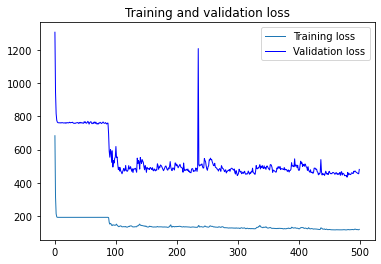

In [39]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(n_epochs)
plt.figure()
plt.plot(epochs, loss, '-', label='Training loss', lw=1)
plt.plot(epochs, val_loss, 'b', label='Validation loss', lw=1)
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.close()

In [42]:
decoded_data = autoencoder(np.array(df2))

In [43]:
decoded_data.shape

TensorShape([2944, 100])

## Example 1:

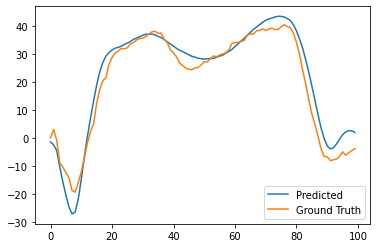

In [45]:
xx = np.arange(0,100)
plt.plot(xx, decoded_data[0], label="Predicted")
plt.plot(xx, np.array(df2)[0], label="Ground Truth")
plt.legend()
plt.show()

## Example 2:

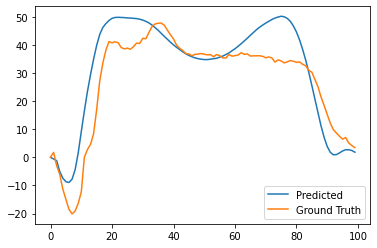

In [46]:
xx = np.arange(0,100)
plt.plot(xx, decoded_data[1], label="Predicted")
plt.plot(xx, np.array(df2)[1], label="Ground Truth")
plt.legend()
plt.show()

## Example 3:

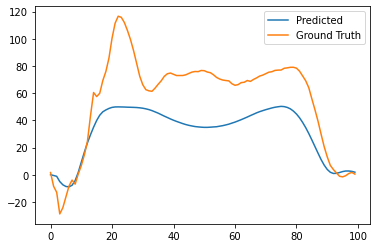

In [47]:
xx = np.arange(0,100)
plt.plot(xx, decoded_data[2], label="Predicted")
plt.plot(xx, np.array(df2)[2], label="Ground Truth")
plt.legend()
plt.show()

# Evaluation Metric:

In [48]:
decoded_data.shape, X_test.shape

(TensorShape([2944, 100]), (3140, 100))

In [50]:
from sklearn.metrics import mean_squared_error

mean_squared_error(np.array(df2), decoded_data)

481.048015985224